In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2, os

In [97]:
satellite_dir_list = [satellite_dir for satellite_dir in os.listdir('data') if not satellite_dir.startswith('.')]
print(satellite_dir_list)

['cloudy', 'water', 'green_area', 'desert']


In [98]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode='categorical', subset='training')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2,)
test_set = test_datagen.flow_from_directory('data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode='categorical',subset='validation')


Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [131]:
satellite_model = tf.keras.models.Sequential()

satellite_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
satellite_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

satellite_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
satellite_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

satellite_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
satellite_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

satellite_model.add(tf.keras.layers.Flatten())

satellite_model.add(tf.keras.layers.Dense(units=128, activation='relu'))

satellite_model.add(tf.keras.layers.Dropout(0.5))

satellite_model.add(tf.keras.layers.Dense(units=64, activation='relu'))

satellite_model.add(tf.keras.layers.Dense(units = 4, activation='softmax'))

satellite_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

satellite_model.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
141/141 [==============================] - 17s 120ms/step - loss: 0.6827 - accuracy: 0.6306 - val_loss: 0.6077 - val_accuracy: 0.6510
Epoch 2/50
141/141 [==============================] - 16s 112ms/step - loss: 0.5065 - accuracy: 0.7487 - val_loss: 0.3647 - val_accuracy: 0.8579
Epoch 3/50
141/141 [==============================] - 16s 113ms/step - loss: 0.4063 - accuracy: 0.8315 - val_loss: 0.3622 - val_accuracy: 0.8286
Epoch 4/50
141/141 [==============================] - 15s 107ms/step - loss: 0.4092 - accuracy: 0.8309 - val_loss: 0.3790 - val_accuracy: 0.8188
Epoch 5/50
141/141 [==============================] - 15s 106ms/step - loss: 0.3927 - accuracy: 0.8426 - val_loss: 0.3518 - val_accuracy: 0.8464
Epoch 6/50
141/141 [==============================] - 15s 105ms/step - loss: 0.3673 - accuracy: 0.8566 - val_loss: 0.3682 - val_accuracy: 0.8508
Epoch 7/50
141/141 [==============================] - 15s 105ms/step - loss: 0.3580 - accuracy: 0.8608 - val_loss: 0.3315 - val_ac

In [140]:
test_image = image.load_img('data/cloudy/train_13602.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = satellite_model.predict(test_image).argmax(axis = 1)
print(result)

[0]


In [141]:
class_dict = training_set.class_indices
print(class_dict)

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


In [142]:
# [list(class_dict.values()).index(int(result))]
prediction = list(class_dict.keys())[int(result)]
print(prediction)

cloudy


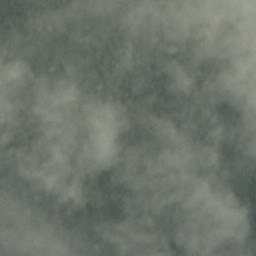

In [143]:
load_img('data/cloudy/train_13602.jpg')